# Rescorla Wagner and Temporal Difference learning models

## Overview

The Rescorla-Wagner model is a formal description of how animals and humans learn the association between different stimuli and outcomes, particularly in the context of Pavlovian or classical conditioning. The model posits that the strength of a stimulus-outcome association is updated incrementally as a result of the prediction error — the difference between expected and actual outcomes. Notable, however, is its failure to encompass the paradigm of secondary conditioning. This is key to sequential decision-making. Secondary conditioning depends on a new quantity, namely the time within each trial, since a positive association with the second stimulus is reliably established only if it precedes the first stimulus in the trials in which they are paired. Temporal Difference (TD) learning incorporates the aspect of time more explicitly than Rescorla Wagner. It shares the foundational concept of the delta rule (prediction error) with the Rescorla-Wagner model but extends it to account for the value of future rewards or outcomes over time. This is done through the estimation of future reward predictions at each time step within a trial or episode, making it possible to adjust predictions based on new information about how those rewards are temporally related to various stimuli.

## Implementation

Here we perform the implementation of the Temporal Difference learning model and its output, given different conditions

In [1]:
# Temporal Difference learning

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def temporal_diff(N, l_r, T, t_s, U, R, mode):
    """ Temporal Difference learning model
    Args: 
        N: number of trials
        l_r: learning rate
        T: number of time points
        t_s: time of stimulus
        U: stimulus strength
        R: reward strength
        mode: mode of reward presentation ('normal', 'Gaussian', 'random')
    Returns:
        error: error vector
        prediction: prediction vector
        stimulus: stimulus vector
        reward: reward vector
        delta_prediction: prediction delta vector
    
    """
    stimulus = np.zeros(T)  # initialize stimulus vector
    stimulus[t_s] = U  # time of stimulus
    reward = np.zeros(T)  # initialize reward vector
    w = np.zeros(T)  # initialize weight vector
    prediction = np.zeros(T)  # initialize prediction vector
    delta_prediction = np.zeros(T)  # initialize prediction delta vector
    error = np.zeros((N, T))  # initialize error vector
    mean = 200
    std_dev = 2
    if mode == 'Gaussian':  # distribute total reward as a Gaussian over several time points
        start_index = 190
        end_index = 210
        x_values = np.arange(T)
        gaussian_curve = stats.norm.pdf(x_values, loc=mean, scale=std_dev)
        area_under_curve = np.trapz(gaussian_curve[start_index:end_index])
        scaling_factor = R / area_under_curve
        scaled_values = scaling_factor * gaussian_curve
        reward[start_index:end_index] = scaled_values[start_index:end_index]

    if mode == 'normal':  # reward is presented at a single time point
        reward[t_s + 100] = 2

    stimulus[t_s] = U
    for Trial in range(N):
        if mode == 'random':  # reward is presented at a single random time point following a Gaussian around time point 200
            r_t = int(np.random.default_rng().normal(mean, std_dev))
            reward[r_t] = R

        for t in range(T - 1):
            prediction[t] = np.convolve(w, stimulus)[t]
            prediction[t + 1] = np.convolve(w, stimulus)[t + 1]
            delta_prediction[t] = prediction[t + 1] - prediction[t]
            
            error[Trial, t] = reward[t] + prediction[t + 1] - prediction[t]
            if error[Trial, t] != 0:
                for tau in range(t + 1):
                    w[tau] += l_r * error[Trial, t] * stimulus[t - tau]
                    


    return (error, prediction, stimulus, reward, delta_prediction)

In [176]:
#plotting functions
def plot(Mode,N,parameter):
    """ Plotting function for Temporal Difference learning model
    Args: 
        Mode: mode of reward presentation ('normal', 'Gaussian', 'random')
        N: number of trials
        parameter: parameter to be plotted ('last trial', 'all trials')
    Returns:
        Plot of reward, prediction error, stimulus onset, prediction, and delta prediction
    """
    
    if parameter == 'last trial':
        a=[N_Trials]
    else:
        a=[1,N_Trials]

    for N in a:
        Results = temporal_diff(N, l_r, T, t_s, U, R, mode=Mode)
        Error = Results[0]

    fig, axs = plt.subplots(5, 2, figsize=(8, 12), sharex=False, sharey=True)
    time_axis = np.arange(0, T, 1)

    for i in range(2):
        axs[0, i].plot(time_axis, Results[3])
        axs[1, i].plot(time_axis, Error[N-1, :])
        axs[2, i].plot(time_axis, Results[2])
        axs[3, i].plot(time_axis, Results[1])
        axs[4, i].plot(time_axis, Results[4])

    Titles = ['Reward', 'Prediction error', 'Stimulus onset',
              'Prediction', r'$\Delta$ Prediction']
    for i in range(0,5):
        fig.text(0.5, 0.97 - (i * 0.185), Titles[i], ha='center', fontsize=16)
    fig.text(0.1,0.98,f'Learning rate = {l_r}', fontsize=12, color='r')
    fig.text(0.1,0.96,f'Number or Trials = {N}', fontsize=12, color='r')
    fig.text(0.72,0.96,f'Mode = {Mode}', fontsize=12, color='r')
    fig.text(0.72,0.98,f'Reward value = {R}', fontsize=12, color='r')

    plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1,
                        right=0.9, hspace=0.5, wspace=0.1,)

    plt.show() 
def _3D():

    fig = plt.figure(figsize=(9, 7))
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(range(N), range(T))

    ax.plot_surface(Y, X, Error.T)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Time')
    ax.set_zlabel('Prediction Error')
    fig.tight_layout()

    plt.show()

The Rescorla-Wagner learning model is a classical theory of classical conditioning. It aims to explain how organisms learn to associate stimuli with outcomes, particularly in Pavlovian or classical conditioning situations. 
It is based on a linear prediction of the reward asociated with the stimulus. Predicted reward (v) is generally a certain weight (w) multiplied by u - a binary, taking values of {0,1} depending on the presence of a stimulus. The weights are such that they minimize the squared error between the reward (r) and its prediction.  
The model introduces the concept of prediction error, which is the discrepancy between the actual and predicted outcomes.
error = r + v(t+1)-v(t)
From the Neurophysiologica standpoint, the form of the prediction error can be interpreted as the activity of dopaminergic cells in the ventral tegmental area. The model also states that the total associative strength of the stimulus present in gven learning process cannot exceed a certain maximum (the asymptote) over trials. Weights of predictions are updated within each trial with the magnitude of a parameter called the 'learning rate':
w += learning rate * error * u


Let's start with using learning rate = 0.5, time of stimulus presentation = 100 and deliver the reward of value 2, distribbuted over several time points around time = 200 as a Gaussian of area = 2. 

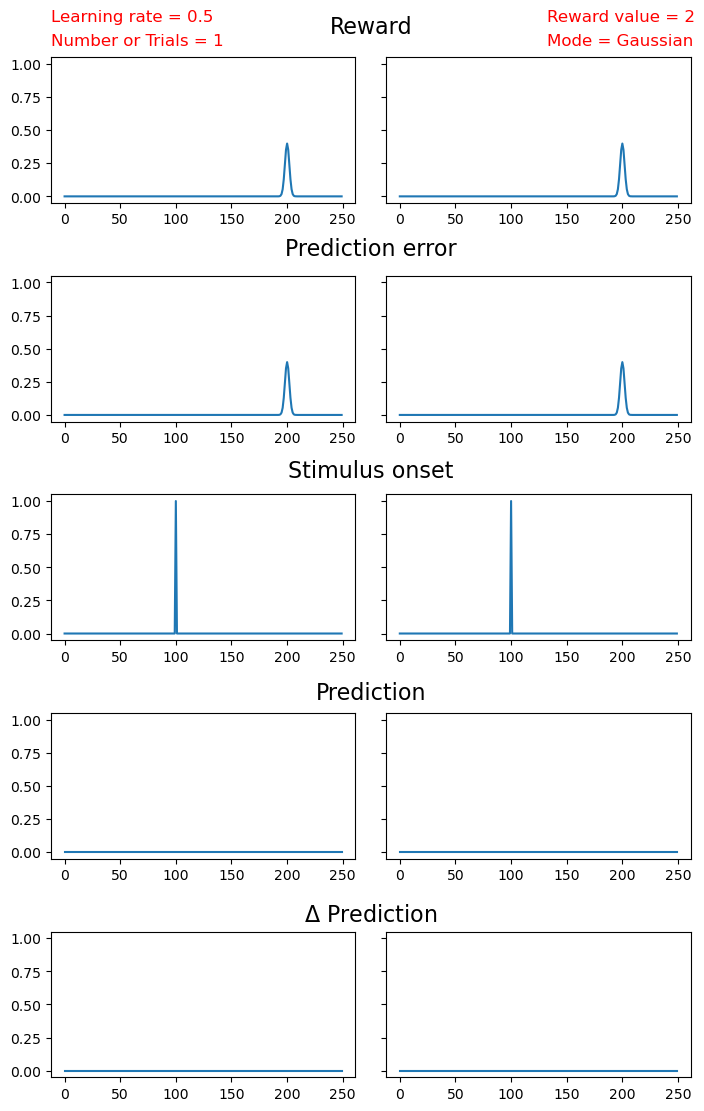

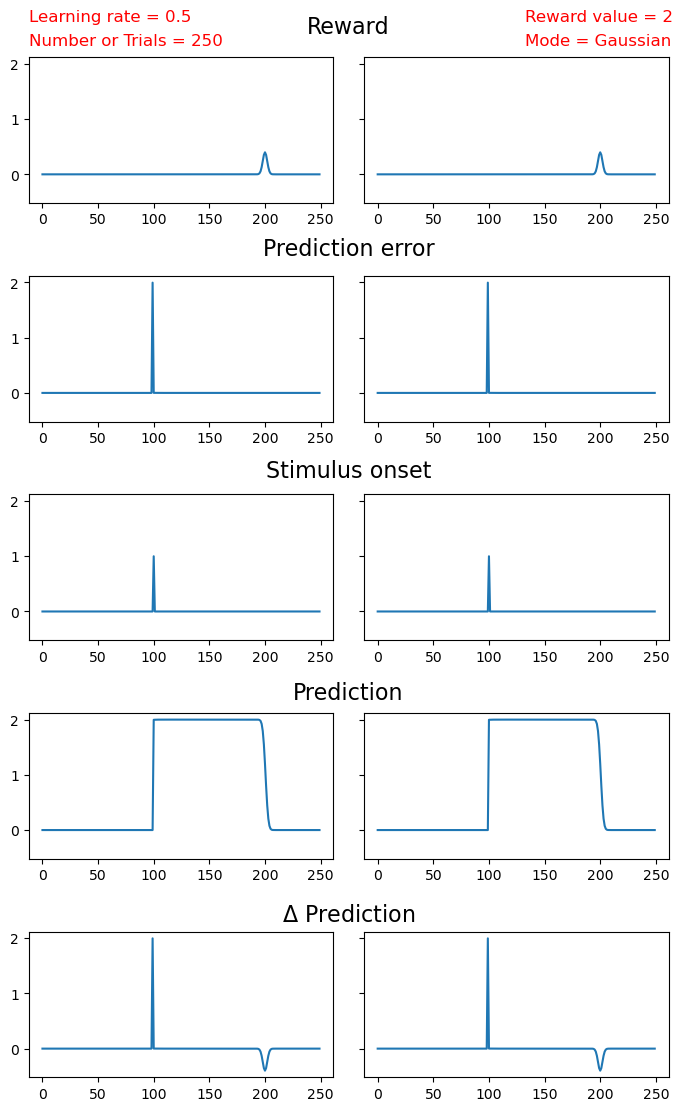

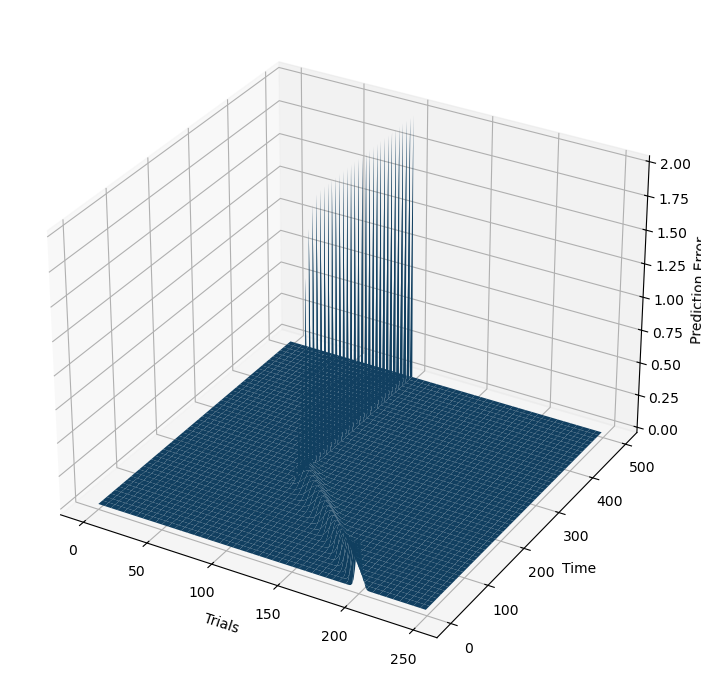

In [160]:
#Simulate Rescorla_Wagner model

# Setup model parameters
l_r = 0.5  # learning rate
N_Trials = 250  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 2  # reward value
Mode = 'Gaussian' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N)
Plot_=_3D()

Initially the weights and predictions are 0 for all time points. After the first trial the temporal prediction error is non-zero at the time of reward, reflecting that the model object initially has little expectation of the reward before the reward is presented. After repeeated trials the prediction error moves backwards in time until it stabilizes at the time of stimulus delivery, as predictions constantly unmatch the actual reward. The animal's predictions shift earlier in time as it learns to associate the stimulus with the reward. Prediction error value is equal to total (integrated) value of the reward presented during each trial. Non-zero prediction error promts the anial to make predictions about the reward as the corresponding assosiation  weights are updated. After sufficient trials (around N=250) prediction values meet their assymptotic level over the whole time course of the trial before the time that reward is presented and the associative learning is complete: v predicts correct future reward from the time of the stimulus onset, and predicts the time of the reward delivery by dropping to zero at that same moment. It can be also noted that the assymptotic level of prediction also matches (predicts) the total value of the reward. So, at the time point when the reward is presented, there are no more expectations, prediction error goes to 0, and the prediction values also go to zero. Gradual descent from the assymptotic level to zero of the prediction function is due to a Gaussian distribution of the reward. The temporal difference term (∆v) is negative around t = 200, exactly matching the delivery of reward.
Overall, in the Rescorla-Wagner model, the temporal prediction error is a crucial concept that reflects the discrepancy between the actual outcome and the expected outcome. It's this prediction error that drives learning.

Let's run the model in other modes with the same parameters. Start with 'normal' mode, where all the reward is delivered at the same time point over different trials

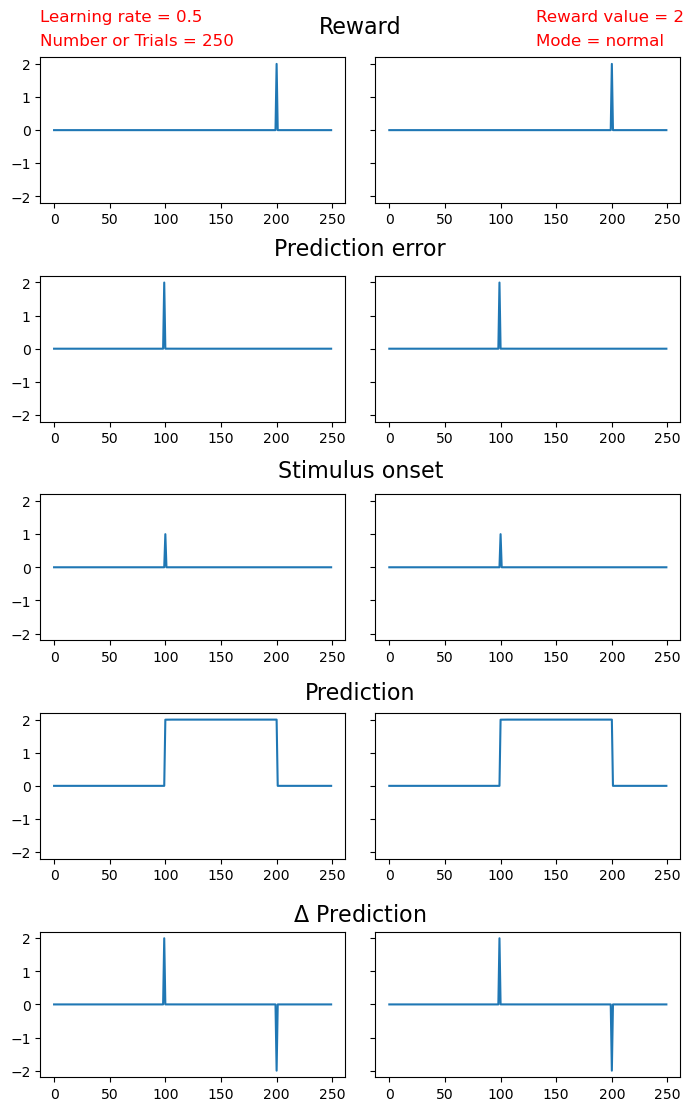

In [177]:
#Simulate Rescorla_Wagner model

# Setup model parameters
l_r = 0.5  # learning rate
N_Trials = 250  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 2  # reward value
Mode = 'normal' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N,parameter='last trial')

The main difference here is that there is no gradual descent of the Prediction curve around the time of the reward delivery. Instead it goes down abruptly at the time point of reward presentation which is in line with the model. Prediction difference at the time point of the reward delivery is correspondigly a single point, rather than a distribution.

Let's run the model with the same parameters in 'random' mode, where all the reward is delivered at a single random time point following the normal distribution around time = 200

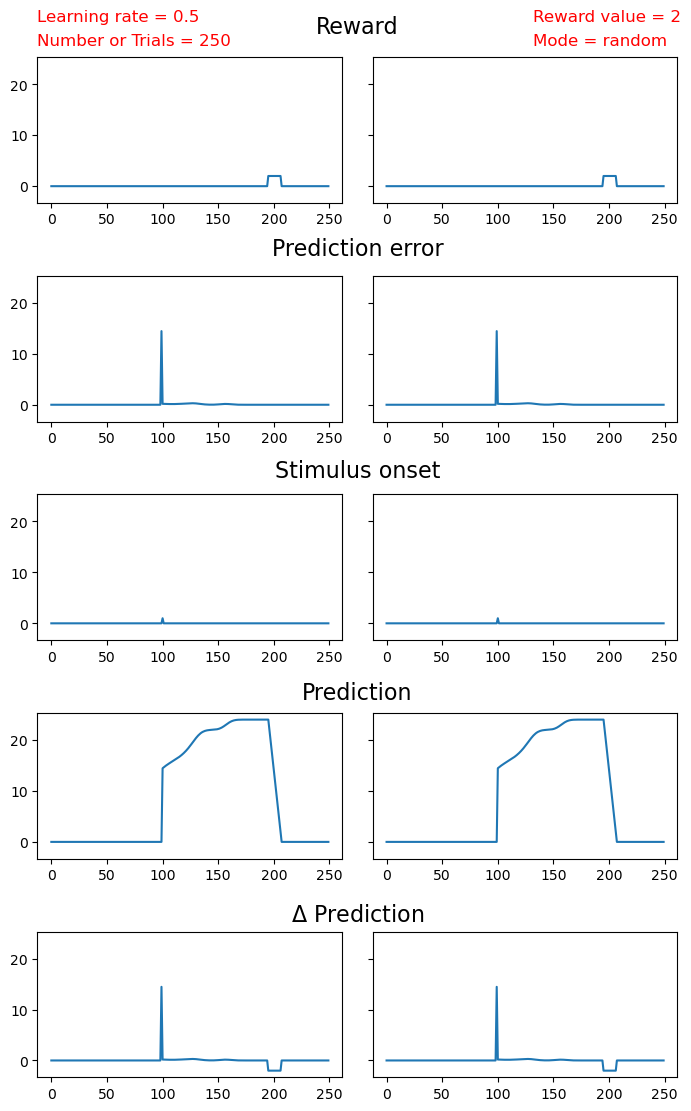

In [179]:
#Simulate Rescorla_Wagner model

# Setup model parameters
l_r = 0.5  # learning rate
N_Trials = 250  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 2  # reward value
Mode = 'random' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N,parameter='last trial')

It can be noted that due to the uncertainty of the time point of the reward delivery, within the same number of trials (N=250), not all the prediction values have met their assymptotyc level, which can be intuitively understood as uncertainty making it harder to learn the assosiation between the stimulus and the reward. Given more trials (about 300) the prediction values stabilize at their assymptotic values as the learning process is complete. Additionaly the outcome can be quite different with every stimulation. Overall the uncertainty in the timing of reward delivery can impact the learning process, requiring more trials for the model to converge to stable predictions. This aligns with the intuitive understanding that uncertainty introduces variability, making it more challenging to establish a robust association between the stimulus and the reward. 

Let's now investigate how the model outcomes depend on the model parameters. Let's increase the learning rate to 0.8 and run the model for less number of trials (N=150) and compare it to the learning rate = 0.5 with the same amount of trials

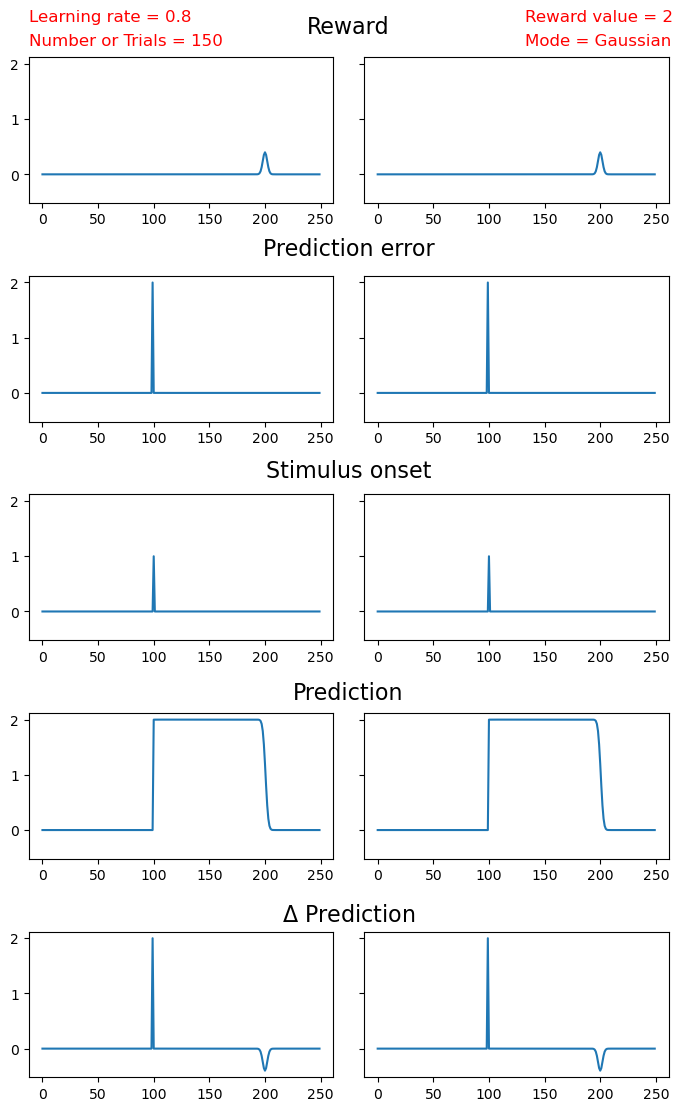

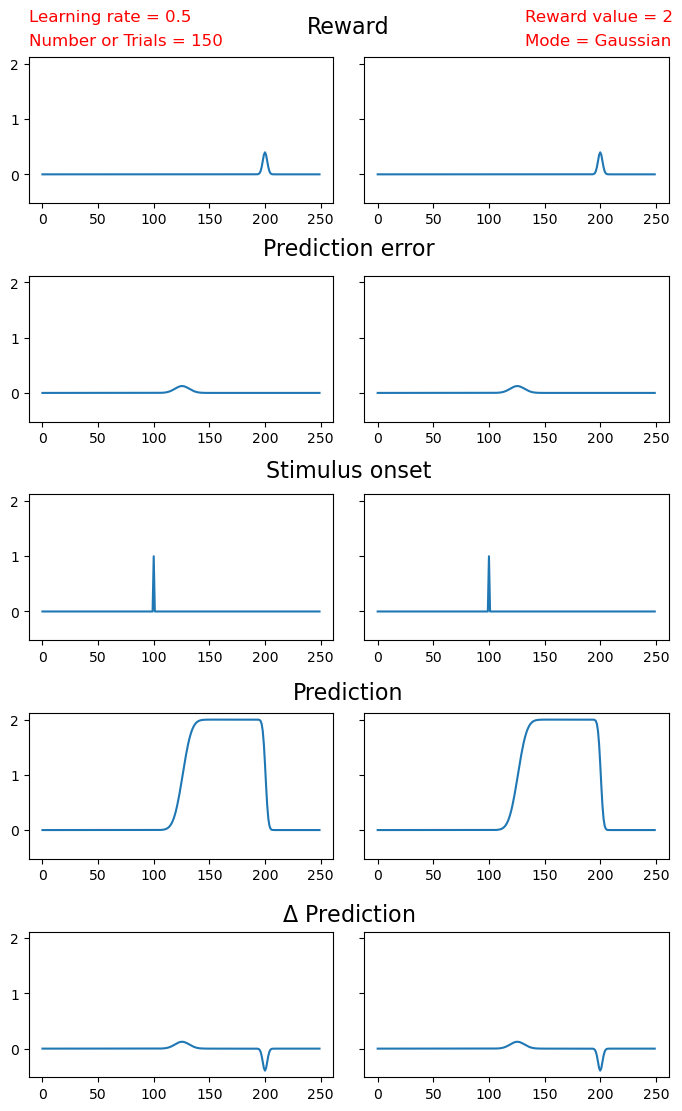

In [181]:
#Simulate Rescorla_Wagner model

# Setup model parameters 1
l_r = 0.8  # learning rate
N_Trials = 150  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 2  # reward value
Mode = 'Gaussian' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N, parameter='last trial')

#Simulate Rescorla_Wagner model

# Setup model parameters 2
l_r = 0.5  # learning rate
N_Trials = 150  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 2  # reward value
Mode = 'Gaussian' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N, parameter='last trial')

As can be seen increasing the learning rate decreases the number of trials, sufficient for forming the complete assosciation between the stimulus and the reward. Intuitively, higher learning rates lead to faster updates and adaptation to the environment.

Let's stick with the leatning rate of 0.8 for the sake of computational resources and look at other parameters to play with. For instance let's increase the reward value two-fold (R=4).

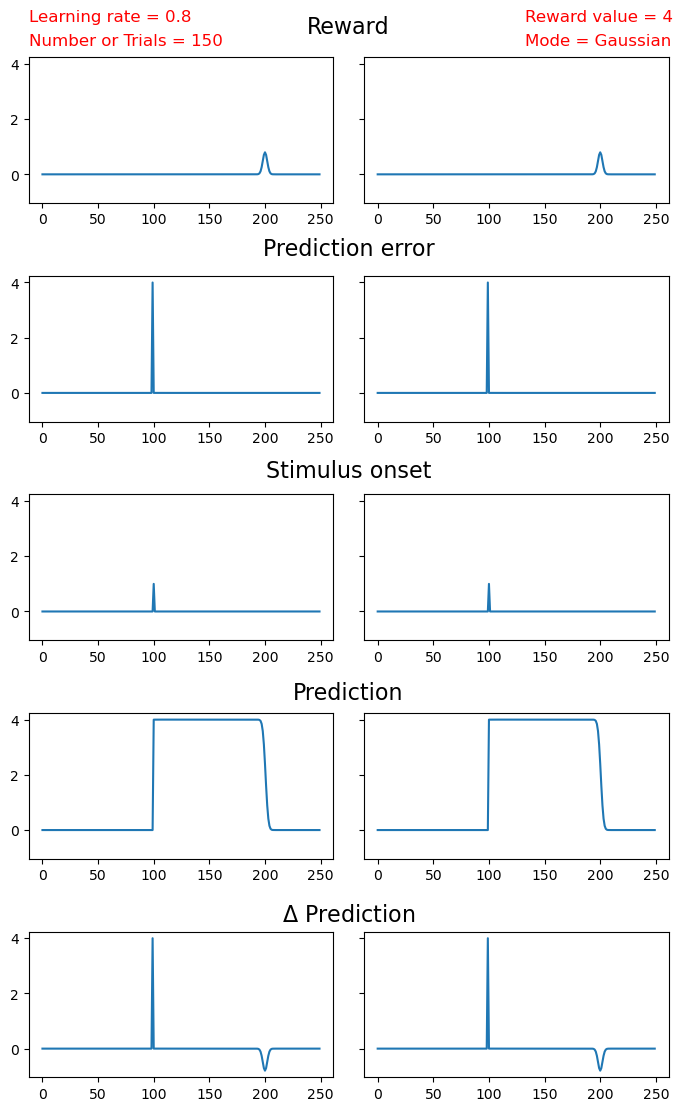

In [183]:
#Simulate Rescorla_Wagner model

# Setup model parameters
l_r = 0.8  # learning rate
N_Trials = 150  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 100  # time of stimulus
R = 4  # reward value
Mode = 'Gaussian' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N, parameter='last trial')

Increasing the reward value sets up a new assymptotyc level for prediction values (=4) and a new peak value of the prediction error. It can be understood as the assymptotic level of prediction values predicts the value of the reward. By reducing the number of trials, it can be seen however that the reward value does not influence the rate of learning which is perhaps a little counterintuitive from the common perspective, but alligns with the mathematical grounds of the model. The Rescorla-Wagner model specifies that the learning rate determines the speed at which associations are updated, while the reward value influences the strength of the association. The model's mathematical formulation separates these two aspects, and this separation explains why changing the reward value might not affect the learning rate directly.

Finally, let's increase the time distance between the stimulus and the reward by 1.5: t_s=50

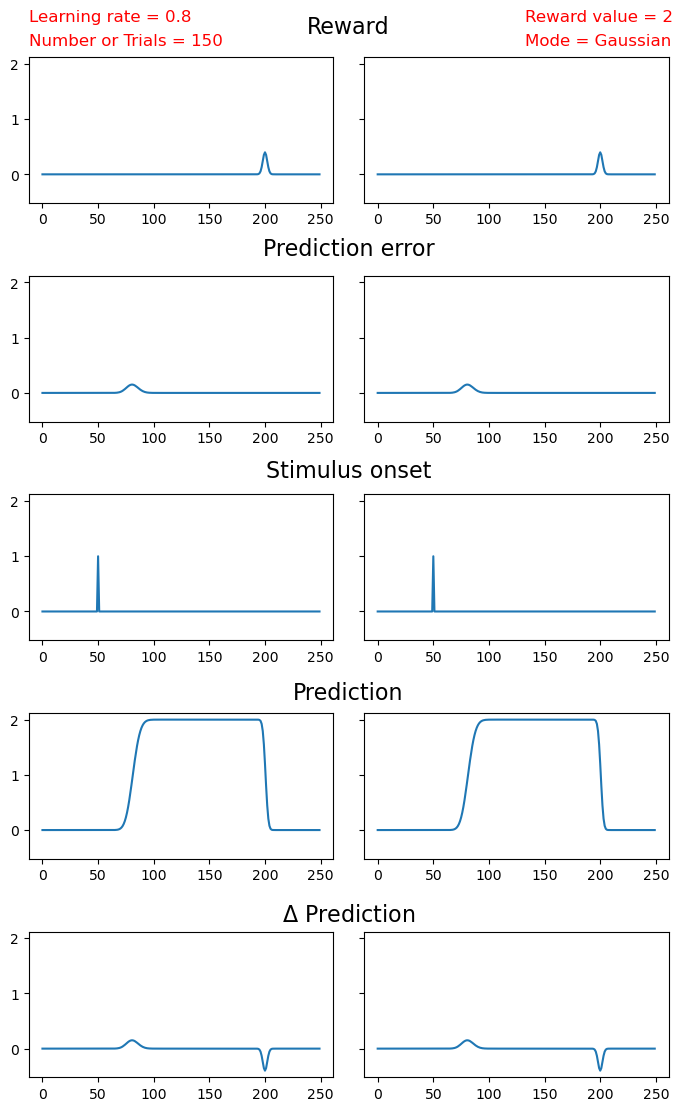

In [185]:
#Simulate Rescorla_Wagner model

# Setup model parameters
l_r = 0.8  # learning rate
N_Trials = 150  # number of trials
T = 250  # end of simulation
U = 1  # stimulus value
t_s = 50  # time of stimulus
R = 2  # reward value
Mode = 'Gaussian' # Mode of simulation (explanation in text and code above)

# Plot the results
Plot=plot(Mode,N, parameter='last trial')

As expected, the prediction values have not yet stabilized at their assymptotic level by the 150's trial. This indicates that that the longer it takes to present the reward after the stimulus, the more trials it takes to learn this assoiation. Extrapolating further, this also prompts that no matter how much apart are the stimulus and the reward - given enough trials, the assosiation will be formed, which might not necessarily be the case in real life, which is perhaps a small downside of this models. However, the stimulus certainly must come before the trial.